## Tranin/Test Splits

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [13]:
df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",")

In [14]:
df.head()

,SEX,AGE,PROMOTIONS,YEARS_EMPLOYED,DID_QUIT
0,0,25,2,3,0
1,0,30,2,3,0
2,0,26,2,3,0
3,0,25,1,2,0
4,0,28,1,2,0


In [15]:
X = df.values[:, :-1]
Y = df.values[:, -1]

In [19]:
model = LogisticRegression(penalty=None)

In [20]:
# shuffle the data first (in case the data is ordered), then split them to 3 parts
# 2 parts as training, 1 part as testing. so total 3 times of training and 3 result
kfold = KFold(n_splits=3, random_state=7, shuffle=True) 

In [21]:
results = cross_val_score(model, X, Y, cv=kfold)

In [22]:
results

array([0.61111111, 0.61111111, 0.61111111])

<br>
<br>

## Confusion Matrices

#### accuracy is a bad measure for classification
#### confusion matrices only apply to testing dataset

#### Terms:
##### $precision = \frac{TP}{(TP + FP)}$
##### $recall/sensitivity = \frac{TP}{(TP + FN)}$
##### $specificity = \frac{TN}{TN + FP}$
##### $negative predicted value = \frac{TN}{TN + FN}$
##### $accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
##### $F1\ score = \frac{2 * (Precision * Recall)}{Precision + Recall}$

<br>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('https://bit.ly/3cManTi', delimiter=",")

In [30]:
df.head()

,SEX,AGE,PROMOTIONS,YEARS_EMPLOYED,DID_QUIT
0,0,25,2,3,0
1,0,30,2,3,0
2,0,26,2,3,0
3,0,25,1,2,0
4,0,28,1,2,0


In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.33)

In [54]:
model = LogisticRegression(penalty=None)

In [55]:
model.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [56]:
y_pred = model.predict(X_test)

In [58]:
matrix = confusion_matrix(y_test, y_pred)

In [59]:
matrix

array([[7, 2],
       [5, 4]])

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.67      0.44      0.53         9

    accuracy                           0.61        18
   macro avg       0.62      0.61      0.60        18
weighted avg       0.62      0.61      0.60        18



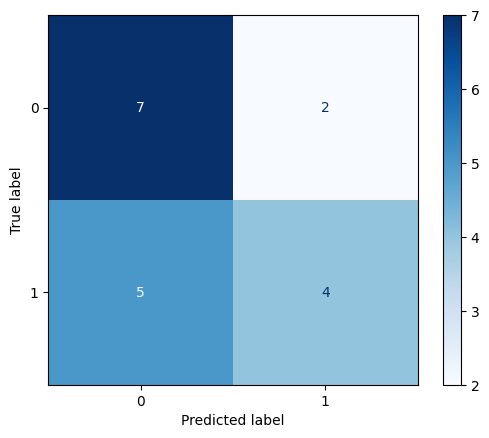

In [61]:
dist = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
dist.plot(cmap='Blues')
plt.show()

### Using ROC & AUC

In [38]:
result = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')

In [40]:
result.mean()

0.8046236171236171

In [42]:
0.99 * 0.01 / 0.248

0.03991935483870968

In [65]:
4/9

0.4444444444444444

In [66]:
4/6

0.6666666666666666

In [67]:
7/12

0.5833333333333334

## Exercises

In [75]:
import numpy as np
import pandas as pd
import statsmodels.api as sms

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/linear_normal.csv', delimiter=',')

In [77]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
sms.L